# Regression Models: Including GNI Growth 
### Predicting GDP Annual Change.
---
Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA

In [2]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

Read in Data

In [3]:
df = pd.read_csv('../../data/data_feat_engin.csv')

Look at columns for features.

In [4]:
df.columns

Index(['Year', 'Country', 'Refugees under UNHCR's mandate', 'Asylum-seekers',
       'IDPs of concern to UNHCR', 'Stateless persons', 'Others of concern',
       'Ref and Asyl', 'SUM REFUGEE', 'GDP_annual_change',
       'Adjusted savings: net national savings (current US$)',
       'Adjusted savings: particulate emission damage (current US$)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Air transport, passengers carried',
       'Current health expenditure (% of GDP)',
       'Current health expenditure per capita (current US$)',
       'Death rate, crude (per 1,000 people)',
       'Domestic general government health expenditure per capita (current US$)',
       'Domestic private health expenditure per capita (current US$)',
       'Ease of doing business score (0 = lowest performance to 100 = best performance)',
       'Fixed broadband subscriptions (per 100 people)',
       'Fixed telephone subscriptions (per 100 people)',
       'GNI growth (ann

## Null Model - GDP Annual Change
---

In [5]:
df['base'] = df['GDP_annual_change'].mean()
RMSE = np.sqrt(metrics.mean_squared_error(df['GDP_annual_change'], df['base']))
RMSE

2.4666729263695077

The Baseline model has a Root Mean Squared Error of 2.47%. On average the predicted GDP Annual Change is about \\2.47% off from the true sales price.

## Regression Pipelines
---
Will first look at all columns, not including feature engineering, and feed into a function for the various regression models. Interpretability will be important with this project, so it will be necessary to keep that in mind as a model is chosen to move forward.

In [6]:
features = ["Refugees under UNHCR's mandate", 
            'Asylum-seekers',
            'IDPs of concern to UNHCR', 
            'Stateless persons', 
            'Others of concern',
            'Ref and Asyl', 
            'SUM REFUGEE',
            'Adjusted savings: net national savings (current US$)',
            'Adjusted savings: particulate emission damage (current US$)',
            'Adolescent fertility rate (births per 1,000 women ages 15-19)',
            'Air transport, passengers carried',
            'Current health expenditure (% of GDP)',
            'Current health expenditure per capita (current US$)',
            'Death rate, crude (per 1,000 people)',
            'Domestic general government health expenditure per capita (current US$)',
            'Domestic private health expenditure per capita (current US$)',
            'Ease of doing business score (0 = lowest performance to 100 = best performance)',
            'Fixed broadband subscriptions (per 100 people)',
            'Fixed telephone subscriptions (per 100 people)',
            'GNI growth (annual %)',
            'International tourism, expenditures (current US$)',
            'International tourism, receipts (current US$)',
            'Military expenditure (current USD)', 'Population growth (annual %)',
            'Prevalence of undernourishment (% of population)',
            'Refugee population by country or territory of asylum',
            'Strength of legal rights index (0=weak to 12=strong)',
            'Unemployment, total (% of total labor force) (modeled ILO estimate)',
            'Net official flows from UN agencies: Total'
           ]

In [7]:
X = df[features]
y = df['GDP_annual_change']

In [8]:
def modelfunc(X, y):
    pipelines = [
        ('LINEAR REGRESSION', (Pipeline([ ('LR', LinearRegression())]))),
        ('DECISION TREE', (Pipeline([ ('TREE', DecisionTreeRegressor())]))),
        ('BAGGED TREE', (Pipeline([ ('BAG', BaggingRegressor())]))),
        ('RANDOM FOREST', (Pipeline([ ('RAND', RandomForestRegressor())]))),
        ('ADABOOST', (Pipeline([ ('ADA', AdaBoostRegressor())]))),
        ('KNN', (Pipeline([ ('sc', StandardScaler()),('KNN', KNeighborsRegressor())]))),
        ('LASSO',(Pipeline([ ('sc', StandardScaler()),('LASSO', LassoCV())]))),
        ('RIDGE',(Pipeline([ ('sc', StandardScaler()),('RIDGE', RidgeCV())])))
    ]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) 
    for pipe_name ,model in pipelines:
        print(pipe_name)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        trainscore = model.score(X_train, y_train)
        testscore = model.score(X_test, y_test)
        crossval = cross_val_score(model, X_train, y_train).mean()
        rmsetr= np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
        rmsete = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
        print (f'Model = {model}')
        print (f'Train Score = {trainscore}')
        print (f'Test Score = {testscore}')
        print (f'Cross Val Score = {crossval}')
        print (f'RMSE Train = {rmsetr}')
        print (f'RMSE Test = {rmsete}')
        print('')
        print('')

In [9]:
modelfunc(X, y)

LINEAR REGRESSION
Model = Pipeline(steps=[('LR', LinearRegression())])
Train Score = 0.5864932870893846
Test Score = 0.5405411536312755
Cross Val Score = 0.4415850218848201
RMSE Train = 1.5023256407333925
RMSE Test = 1.911523268170177


DECISION TREE
Model = Pipeline(steps=[('TREE', DecisionTreeRegressor())])
Train Score = 1.0
Test Score = 0.42204991778503564
Cross Val Score = 0.0946434028214741
RMSE Train = 8.176345093409794e-17
RMSE Test = 2.1438847986573335


BAGGED TREE
Model = Pipeline(steps=[('BAG', BaggingRegressor())])
Train Score = 0.9333911621254156
Test Score = 0.5718123502182983
Cross Val Score = 0.5536576607971864
RMSE Train = 0.6029603102055351
RMSE Test = 1.8453270517097586


RANDOM FOREST
Model = Pipeline(steps=[('RAND', RandomForestRegressor())])
Train Score = 0.9519584033550006
Test Score = 0.5981168993497186
Cross Val Score = 0.5923136042042156
RMSE Train = 0.5120725711002893
RMSE Test = 1.7877473877710552


ADABOOST
Model = Pipeline(steps=[('ADA', AdaBoostRegressor(

### Random Forest performed the best according to the function above. Dig into it with some tuning below.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) 

rand = RandomForestRegressor()
# rand.fit(X_train, y_train)

params = {
    'n_estimators': [75, 100, 125],
    'max_depth': [None, 3, 4, 5], 
    'max_features': ['auto', 'sqrt', 3, 4, 5]
}
gs = GridSearchCV(RandomForestRegressor(), 
                 param_grid = params, 
                 verbose = 1)

gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)



Fitting 5 folds for each of 60 candidates, totalling 300 fits
0.5900629188375082
{'max_depth': None, 'max_features': 'auto', 'n_estimators': 125}


## Below Changing features and running through the same function.
---
Adding engineered features.

In [11]:
features = ["Refugees under UNHCR's mandate", 
            'Asylum-seekers',
            'IDPs of concern to UNHCR', 
            'Stateless persons', 
            'Others of concern',
            'Ref and Asyl', 
            'SUM REFUGEE',
            'Adjusted savings: net national savings (current US$)',
            'Adjusted savings: particulate emission damage (current US$)',
            'Adolescent fertility rate (births per 1,000 women ages 15-19)',
            'Air transport, passengers carried',
            'Current health expenditure (% of GDP)',
            'Current health expenditure per capita (current US$)',
            'Death rate, crude (per 1,000 people)',
            'Domestic general government health expenditure per capita (current US$)',
            'Domestic private health expenditure per capita (current US$)',
            'Ease of doing business score (0 = lowest performance to 100 = best performance)',
            'Fixed broadband subscriptions (per 100 people)',
            'Fixed telephone subscriptions (per 100 people)',
            'GNI growth (annual %)',
            'International tourism, expenditures (current US$)',
            'International tourism, receipts (current US$)',
            'Military expenditure (current USD)', 'Population growth (annual %)',
            'Prevalence of undernourishment (% of population)',
            'Refugee population by country or territory of asylum',
            'Strength of legal rights index (0=weak to 12=strong)',
            'Unemployment, total (% of total labor force) (modeled ILO estimate)',
            'Net official flows from UN agencies: Total', 
            'Intl tourism expenditures recipts and asylum seekers', 
            'Intl tourism expenditures receipts and military',
            'net inflows UN and refugee pop', 
            'SUM REFUGEE and undernourishment'
           ]

In [12]:
X = df[features]
y = df['GDP_annual_change']

In [13]:
modelfunc(X, y)

LINEAR REGRESSION
Model = Pipeline(steps=[('LR', LinearRegression())])
Train Score = 0.002557638906477644
Test Score = -0.017215223763378917
Cross Val Score = -0.009983658394374938
RMSE Train = 2.3332791579773127
RMSE Test = 2.844216854015721


DECISION TREE
Model = Pipeline(steps=[('TREE', DecisionTreeRegressor())])
Train Score = 1.0
Test Score = 0.41828626039884587
Cross Val Score = 0.3030629335927799
RMSE Train = 8.176345093409794e-17
RMSE Test = 2.150854046052494


BAGGED TREE
Model = Pipeline(steps=[('BAG', BaggingRegressor())])
Train Score = 0.9441729950314
Test Score = 0.5870461104638071
Cross Val Score = 0.613013236615706
RMSE Train = 0.5520074791603531
RMSE Test = 1.8122038990449512


RANDOM FOREST
Model = Pipeline(steps=[('RAND', RandomForestRegressor())])
Train Score = 0.9499189252072778
Test Score = 0.5874563887333714
Cross Val Score = 0.5791450287817088
RMSE Train = 0.5228289385724026
RMSE Test = 1.8113034442204914


ADABOOST
Model = Pipeline(steps=[('ADA', AdaBoostRegress

Again, the Random Forest is performing the best. 

## Changing Features again to look at those with the highest correlation.
---

In [14]:
features = ['GNI growth (annual %)', 
            'Stateless persons',
            'Strength of legal rights index (0=weak to 12=strong)',
            'Adjusted savings: net national savings (current US$)',
            'Adjusted savings: particulate emission damage (current US$)',
            'Adolescent fertility rate (births per 1,000 women ages 15-19)',
            'Population growth (annual %)', 
            'Unemployment, total (% of total labor force) (modeled ILO estimate)',
            'Fixed telephone subscriptions (per 100 people)',
            'Current health expenditure (% of GDP)',
            'Current health expenditure per capita (current US$)',
            'Domestic general government health expenditure per capita (current US$)',
            'Fixed broadband subscriptions (per 100 people)',
            'Domestic private health expenditure per capita (current US$)',
            'International tourism, expenditures (current US$)',
            "Refugees under UNHCR's mandate", 
            'Asylum-seekers',
            'IDPs of concern to UNHCR', 
            'Others of concern',
            'Ref and Asyl', 
            'SUM REFUGEE',
            'Intl tourism expenditures recipts and asylum seekers', 
            'Intl tourism expenditures receipts and military',
            'net inflows UN and refugee pop', 
            'SUM REFUGEE and undernourishment'
           ]

In [15]:
X = df[features]
y = df['GDP_annual_change']

In [16]:
modelfunc(X, y)

LINEAR REGRESSION
Model = Pipeline(steps=[('LR', LinearRegression())])
Train Score = 0.002557638906477644
Test Score = -0.017215223763378695
Cross Val Score = -0.010641886204069362
RMSE Train = 2.3332791579773127
RMSE Test = 2.844216854015721


DECISION TREE
Model = Pipeline(steps=[('TREE', DecisionTreeRegressor())])
Train Score = 1.0
Test Score = 0.4391541642137079
Cross Val Score = 0.3409562882933181
RMSE Train = 5.781549060871421e-17
RMSE Test = 2.1119227562242266


BAGGED TREE
Model = Pipeline(steps=[('BAG', BaggingRegressor())])
Train Score = 0.9339210083211935
Test Score = 0.5847980948056399
Cross Val Score = 0.5586511523659526
RMSE Train = 0.6005573701293118
RMSE Test = 1.8171297922452851


RANDOM FOREST
Model = Pipeline(steps=[('RAND', RandomForestRegressor())])
Train Score = 0.9527757982062592
Test Score = 0.5628013690628727
Cross Val Score = 0.5910806645305878
RMSE Train = 0.5076976000040625
RMSE Test = 1.8646429205099164


ADABOOST
Model = Pipeline(steps=[('ADA', AdaBoostReg

Again, Random Forest is produces the best results.

Doing a GridSearch below to see if this can be increased at all from a cross val r2 score of .59.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) 

rand = RandomForestRegressor()
# rand.fit(X_train, y_train)

params = {
    'n_estimators': [75, 100, 125, 150, 175, 200],
    'max_depth': [None, 3, 4, 5], 
    'max_features': ['auto', 'sqrt', 3, 4, 5]
}
gs = GridSearchCV(RandomForestRegressor(), 
                 param_grid = params, 
                 verbose = 1)

gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.6006770707154129
{'max_depth': None, 'max_features': 'auto', 'n_estimators': 125}


In [20]:
rand = RandomForestRegressor(max_depth=None, max_features='auto', n_estimators = 125)
rand.fit(X_train, y_train)
y_pred_train = rand.predict(X_train)
y_pred_test = rand.predict(X_test)
trainscore = rand.score(X_train, y_train)
testscore = rand.score(X_test, y_test)
crossval = cross_val_score(rand, X_train, y_train).mean()
rmsetr= np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
rmsete = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print (f'Train Score = {trainscore}')
print (f'Test Score = {testscore}')
print (f'Cross Val Score = {crossval}')
print (f'RMSE Train = {rmsetr}')
print (f'RMSE Test = {rmsete}')

Train Score = 0.9553702897452656
Test Score = 0.5690826613688186
Cross Val Score = 0.6024442218687008
RMSE Train = 0.4935541762352067
RMSE Test = 1.8511996711104641


In [45]:
feat_imp = pd.DataFrame(rand.feature_importances_, 
          index=X_train.columns)
feat_imp.sort_values(0, ascending = False)
feat_imp.columns = ['Relative Importance']
feat_imp

,Relative Importance
GNI growth (annual %),0.632466
Stateless persons,0.007078
Strength of legal rights index (0=weak to 12=strong),0.017894
Adjusted savings: net national savings (current US$),0.011982
Adjusted savings: particulate emission damage (current US$),0.013362
"Adolescent fertility rate (births per 1,000 women ages 15-19)",0.010588
Population growth (annual %),0.010142
"Unemployment, total (% of total labor force) (modeled ILO estimate)",0.017926
Fixed telephone subscriptions (per 100 people),0.013881
Current health expenditure (% of GDP),0.015250


In [53]:
feat_imp['Relative Importance'].sum()

1.0

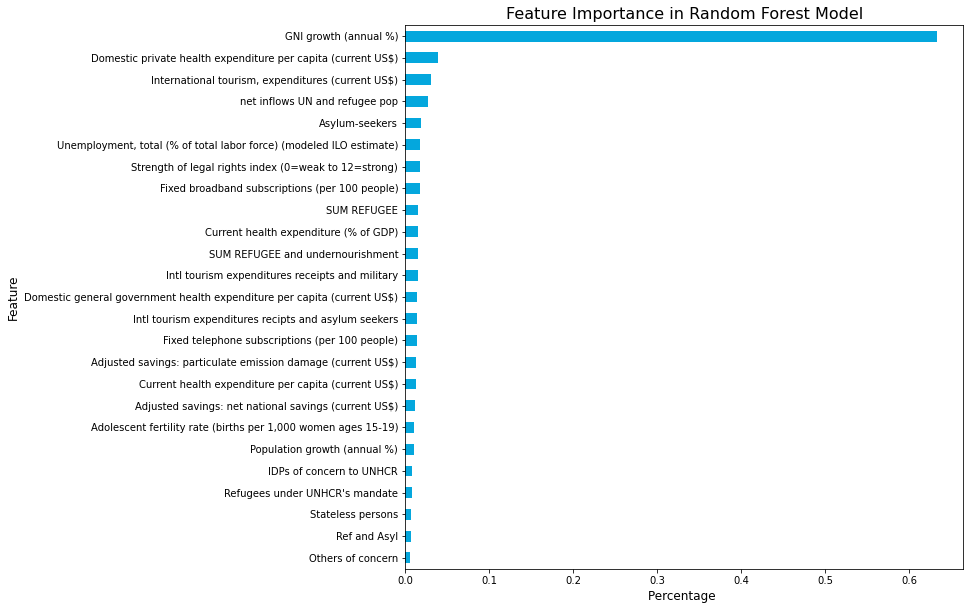

In [55]:
plt.rcParams["figure.figsize"]=(10,10)
feat_imp.sort_values('Relative Importance', ascending = True).plot(kind='barh',
             legend = None, 
             color = '#04a7dd')
plt.title('Feature Importance in Random Forest Model', fontdict = {'fontsize': 16})
plt.xlabel('Percentage ', fontdict = {'fontsize': 12})
plt.yticks(fontsize = 10)
plt.ylabel('Feature', fontdict = {'fontsize': 12});

The data above is heavily correlated to the GNI Growth %. Because this number is heavily correlated with GDP, which we are trying to predict. We will also instead look at the features without GNI and creat models in another notebook.